**Random Forrest for Project*

In [1]:
# Load all dependencies and the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Add a new column with the country names.
# This is what we are going to try to predict.
# data['country'] = pd.Categorical.from_codes(country, country_names)
    #error


In [3]:
df = pd.read_csv('additional_co2_abs.csv')
df = df.dropna(how='any',axis=1)
df.columns

Index(['Unnamed: 0', 'country', 'year', 'cement_co2', 'coal_co2',
       'flaring_co2', 'gas_co2', 'oil_co2', 'consumption_co2',
       'PM2.5 air pollution - mean annual exposure (micrograms per cubic meter)',
       'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'category'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,consumption_co2,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02,112.000000
mean,55.500000,2003.500000,229.106554,2754.142286,65.588536,1259.666768,2255.310259,6432.388321,30.016055,7.634137e+05,43.988674
std,32.475632,8.114052,310.365680,2699.787083,22.661605,737.785063,1245.797496,4353.021258,17.674516,8.843183e+05,22.995875
min,0.000000,1990.000000,22.801000,288.587000,20.795000,74.273000,243.984000,456.070000,7.311075,6.226000e+04,10.760773
25%,27.750000,1996.750000,59.689750,1214.493250,57.180250,557.150750,1559.589500,4626.873750,12.481460,1.549845e+05,26.532683
50%,55.500000,2003.500000,92.848500,2031.205500,63.492500,1512.642500,2586.926000,6659.371500,29.751709,3.869815e+05,35.333365
75%,83.250000,2010.250000,176.114500,3056.984500,72.084500,1795.707750,3026.813500,7656.375250,47.833125,7.981218e+05,65.485827
max,111.000000,2017.000000,1195.419000,10719.039000,163.145000,2762.551000,4638.977000,18223.134000,54.520674,3.235892e+06,88.131229


In [5]:
def round_5(x, base=198352):
    return base * round(x/base)
df['Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'] = round_5(df['Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'], base=5)

df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'] = round_5(df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'], base=5)

In [6]:
df.head()

,Unnamed: 0,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,consumption_co2,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category
0,0,Africa,1990,22.801,295.760,20.795,75.954,243.984,456.070,46.719096,169060.0,25.0,Africa
1,1,Africa,1991,24.426,306.508,20.799,78.466,258.828,475.983,46.530559,173285.0,25.0,Africa
2,2,Africa,1992,24.904,288.587,23.351,74.273,257.562,485.220,46.342022,177905.0,25.0,Africa
3,3,Africa,1993,24.609,318.855,21.790,81.722,261.882,500.671,46.153485,183150.0,25.0,Africa
4,4,Africa,1994,25.111,330.702,21.797,85.588,256.425,504.509,45.964949,188665.0,25.0,Africa


In [7]:
# Convert the country names to a digit (0, 1, 2) for each class.
df['country'] = pd.factorize(df['country'])[0]
df.head(90)

,Unnamed: 0,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,consumption_co2,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category
0,0,0,1990,22.801,295.760,20.795,75.954,243.984,456.070,46.719096,169060.0,25.0,Africa
1,1,0,1991,24.426,306.508,20.799,78.466,258.828,475.983,46.530559,173285.0,25.0,Africa
2,2,0,1992,24.904,288.587,23.351,74.273,257.562,485.220,46.342022,177905.0,25.0,Africa
3,3,0,1993,24.609,318.855,21.790,81.722,261.882,500.671,46.153485,183150.0,25.0,Africa
4,4,0,1994,25.111,330.702,21.797,85.588,256.425,504.509,45.964949,188665.0,25.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,3,1991,52.197,1948.180,57.573,1247.793,2600.055,5827.175,9.528191,109720.0,25.0,North America
86,86,3,1992,52.877,1973.354,58.698,1290.184,2655.655,6039.259,9.501610,109045.0,25.0,North America
87,87,3,1993,55.585,2026.203,59.008,1322.542,2674.693,6092.632,9.475030,111160.0,25.0,North America
88,88,3,1994,59.479,2044.334,59.804,1354.945,2742.213,6214.441,9.448450,111940.0,25.0,North America


Let's now split the entire dataset into a training and testing set.

In [8]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.75
df.head()

train_df = df[df['is_train']]
test_df  = df[~df['is_train']]

print('Length of train data:', len(train_df))
print('Length of test data :', len(test_df))

Length of train data: 84
Length of test data : 28


Let's now construct the features (input to Decision Tree) and the classes (target of the Decision Tree).

In [9]:
features = df.columns[3:-4]
features

Index(['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'consumption_co2',
       'PM2.5 air pollution - mean annual exposure (micrograms per cubic meter)'],
      dtype='object')

In [10]:
#df['oil_co2'] = round(df['oil_co2'])
#print(df['oil_co2'])

In [11]:
targets  = df.columns[-4]
targets
#print(df['oil_co2'])

'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'

We can construct a Decision Tree object and train it.

In [12]:
#df = pd.DataFrame(df)


In [13]:
#df.values.tolist() # as list

In [14]:
clf = DecisionTreeClassifier()


In [15]:
# from sklearn import preprocessing
# from sklearn import utils
#
# #convert y values to categorical values
# lab = preprocessing.LabelEncoder()




In [16]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# train_df = label_encoder.fit_transform(train_df)

In [17]:
clf.fit(train_df[features], train_df[targets])


DecisionTreeClassifier()

Now let's use the trained model to predict the class of test samples. Often it is useful to also display the probabilities with which the algorithm classifies a given sample.

In [18]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [19]:
clf.predict_proba(test_df[features])


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

We can create a confusion matrix to show get a quick overview which classes are easy to predict and which ones are more difficult to distinguish.

In [20]:
predict_proba = clf.predict(test_df[features])
pd.crosstab(test_df['country'],
            predict_proba,
            rownames=['Actual Country'], 
            colnames=['Predicted Country'])

Predicted Country,66705.0,106490.0,109045.0,109735.0,111505.0,111735.0,183150.0,198040.0,215795.0,240765.0,...,463115.0,540055.0,605895.0,612800.0,1443560.0,1487300.0,1847320.0,2118185.0,2343095.0,2976715.0
Actual Country,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
3,1,1,2,1,1,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Finally we can inspect which features are most important in the classification by reading out the feature importances.

In [21]:
fi = pd.DataFrame(clf.feature_importances_,
                  index=df.columns[3:-4],
                  columns=['Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'])
fi_sorted = fi.sort_values('Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)', ascending=False)
fi_sorted

# AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)
flaring_co2,0.240964
cement_co2,0.180723
oil_co2,0.144578
coal_co2,0.132530
gas_co2,0.108434
consumption_co2,0.108434
PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),0.084337


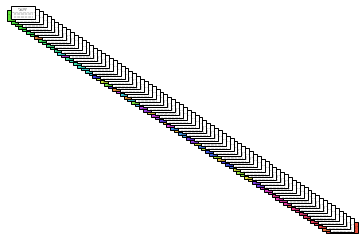

In [22]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
tree_fig = plot_tree(clf, filled=True)

[Text(0.023255813953488372, 0.9940476190476191, 'X[4] <= 250.204\ngini = 0.988\nsamples = 84\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.011627906976744186, 0.9821428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.03488372093023256, 0.9821428571428571, 'X[2] <= 21.794\ngini = 0.988\nsamples = 83\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

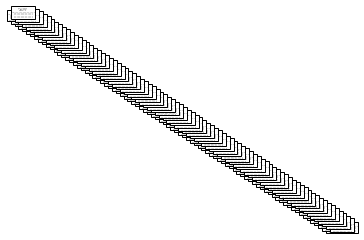

In [23]:
plot_tree(clf)